In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import scipy.stats as st
import math
import statistics


In [3]:
file = "final.csv"
data_df = pd.read_csv(file)
data_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0


In [4]:
#  Base Graph
# Total Sq Ft vs Price
data_df.plot(kind='scatter', x="Total Sq Ft", y="Sale Price", edgecolor='white', color='blue', title="House Size vs Price",
            yticks=(np.arange(0,5000000,500000)))
plt.grid()
plt.ylabel("Sale Price (in $MM)")
plt.xlabel("Total Square Feet")
x_axis = data_df['Total Sq Ft']
y_axis = data_df['Sale Price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(4200,10),fontsize=10,color="blue")
plt.plot(x_axis, regress_values,"b--")
plt.savefig("Images/graph1-size-vs-price.png")
plt.show()

<IPython.core.display.Javascript object>

In [5]:
nohs_df = data_df[data_df['High School'].isna()]
nohs_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
16,6036339,150500.0,2021-03-15,1137 Van Buren ST,81004,780.0,9365.4,38.8677835,-104.803721,NaN,3.0,West Middle School,2.0,West Elementary School,4.0,192.948718,54.0
40,5615163,325000.0,2021-03-09,508 Rowe LN,80911,2394.0,7900.0,38.7279834,-104.708825,NaN,2.0,Janitell Junior High School,3.0,Grand Mountain School,3.0,135.756057,9.0
48,9227549,16000.0,2021-01-05,37131 Highway 24 HW,80830,1163.0,16030.0,39.1714478,-103.972425,NaN,NaN,Falcon Middle School,NaN,High Plains Elementary School,NaN,13.757524,6.0
49,7674186,120000.0,2021-01-07,1020 Ruppel ST,81001,1790.0,7150.0,38.2843445,-104.592637,NaN,1.0,North Middle School,0.0,Skyway Park Elementary School,2.0,67.039106,56.0
53,3243865,160000.0,2021-01-04,935 Saturn DR #4,80905,810.0,214.0,38.80686,-104.845234,NaN,5.0,NaN,5.0,Coperni 2,4.0,197.530864,48.0


In [6]:
hs_df = data_df[data_df['High School'].notna()]
hs_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0


In [7]:
# Attempt 1 for subplotting
# x_axis = data_df.loc[data_df['High School'].isna(), ["Total Sq Ft"]]
# y_axis = data_df.loc[data_df['High School'].isna(), ["Sale Price"]]
# plt.scatter(x_axis, y_axis, s=2, c='r', marker="o", label='HS Nearby')
# plt.grid()
# plt.legend(loc='best')
# plt.title("Size vs Price of Houses with a High School Closeby")
# plt.xlabel("Total Square Feet")
# plt.ylabel("Sale Price (in $MM)")
# plt.show()
# x_axis_2 = data_df.loc[data_df['High School'].notna(), ["Total Sq Ft"]]
# y_axis_2 = data_df.loc[data_df['High School'].notna(), ["Sale Price"]]
# plt.scatter(x_axis_2, y_axis_2, s=2, c='b', marker="o", label='No HS Nearby')
# plt.grid()
# plt.legend(loc='best')
# plt.title("Size vs Price of Houses without a High School Closeby")
# plt.xlabel("Total Square Feet")
# plt.ylabel("Sale Price (in $MM)")
# plt.show()

<IPython.core.display.Javascript object>


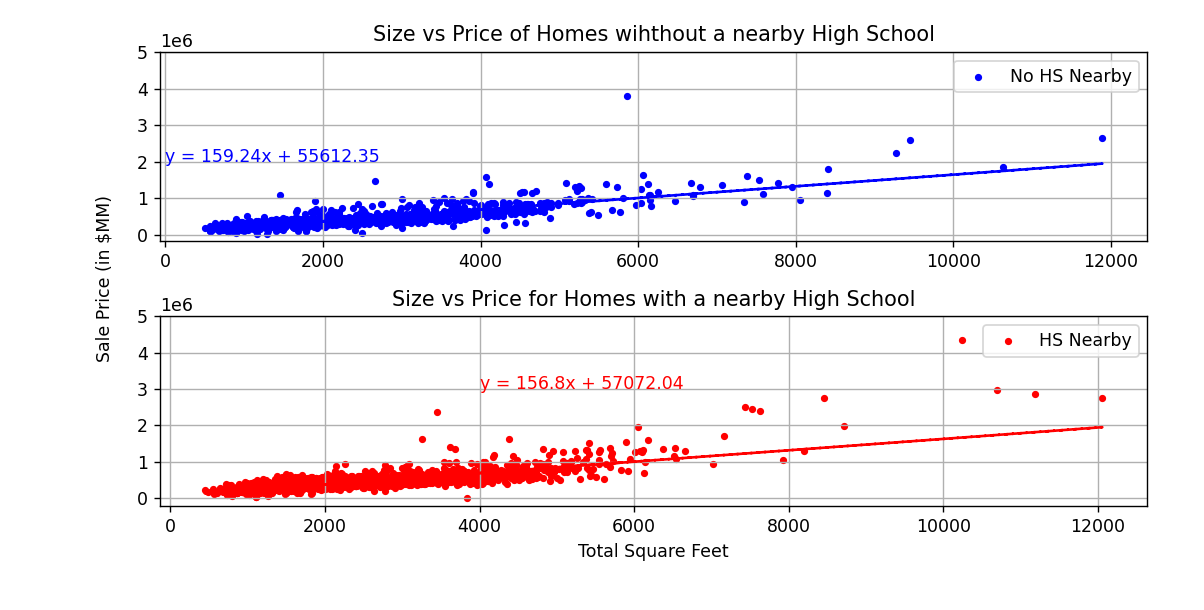

In [8]:
#Scatter Plot 1 total sq ft vs price
#Comparing to if there is a High School nearby vs. not
x_axis = nohs_df["Total Sq Ft"]
y_axis = nohs_df["Sale Price"]
x_axis_2 = hs_df["Total Sq Ft"]
y_axis_2 = hs_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No HS Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout a nearby High School")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(4000,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='HS Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby High School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph2-hs-vs-no-hs")
plt.show()

In [9]:
noms_df = data_df[data_df['Middle School'].isna()]
noms_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0
24,9951614,211000.0,2021-03-19,6611 Proud Eagle CT,80915,960.0,720.0,38.850986,-104.703877,John Mall High School,2.0,NaN,3.0,Rockrimmon Elementary School,2.0,219.791667,41.0
28,7641404,335000.0,2021-03-19,4324 Witches Hollow LN,80911,1648.0,5227.2,38.7697952,-104.744187,Mitchell High School,1.0,NaN,NaN,Pueblo Charter School For The Arts & Sciences,NaN,203.276699,29.0
31,8690811,330000.0,2021-03-16,4555 Borden DR,80911,1548.0,5000.0,38.7673718,-104.744050,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Widefield District 3 Preschool,NaN,213.178295,35.0


In [10]:
ms_df = data_df[data_df['Middle School'].notna()]
ms_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
5,3210548,425000.0,2021-03-17,10146 Moorcroft DR,80831,2848.0,11250.0,38.9765231,-104.628230,Falcon High School,3.0,North Middle School,3.0,NaN,3.0,149.227528,1.0
6,3748005,157000.0,2021-03-16,434 Valley Hi CR #D-24,80910,1072.0,0.0,38.8247919,-104.765845,Eastlake High School Of Colorado Springs,0.0,Falcon Middle School,1.0,Bennett Ranch Elementary School,0.0,146.455224,22.0


In [11]:
es_df = data_df[data_df['Elementary School'].notna()]
es_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0


In [12]:
noes_df = data_df[data_df['Elementary School'].isna()]
noes_df.head()

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
5,3210548,425000.0,2021-03-17,10146 Moorcroft DR,80831,2848.0,11250.0,38.9765231,-104.628230,Falcon High School,3.0,North Middle School,3.0,NaN,3.0,149.227528,1.0
20,4063233,215000.0,2021-03-17,4831 Sonata DR #A,80918,780.0,810.0,38.9017849,-104.765170,Community Prep Charter School,2.0,North Middle School,2.0,NaN,3.0,275.641026,70.0
26,6233204,295000.0,2021-03-15,718 Bryce DR,80910,1062.0,6890.0,38.8215759,-104.782838,South High School,0.0,Pueblo Academy Of Arts,NaN,NaN,1.0,277.777778,46.0
32,2691609,281000.0,2021-03-12,3976 Riviera GR #203,80922,1276.0,685.0,38.88881070000001,-104.704333,Discovery High School,2.0,Sabin Middle School,3.0,NaN,4.0,220.219436,29.0
36,2770106,350000.0,2021-03-19,7350 Woody Creek DR,80911,2529.0,6760.0,38.7242287,-104.683995,Mesa Ridge High School,2.0,Horizon Middle School,3.0,NaN,3.0,138.394622,4.0


<IPython.core.display.Javascript object>


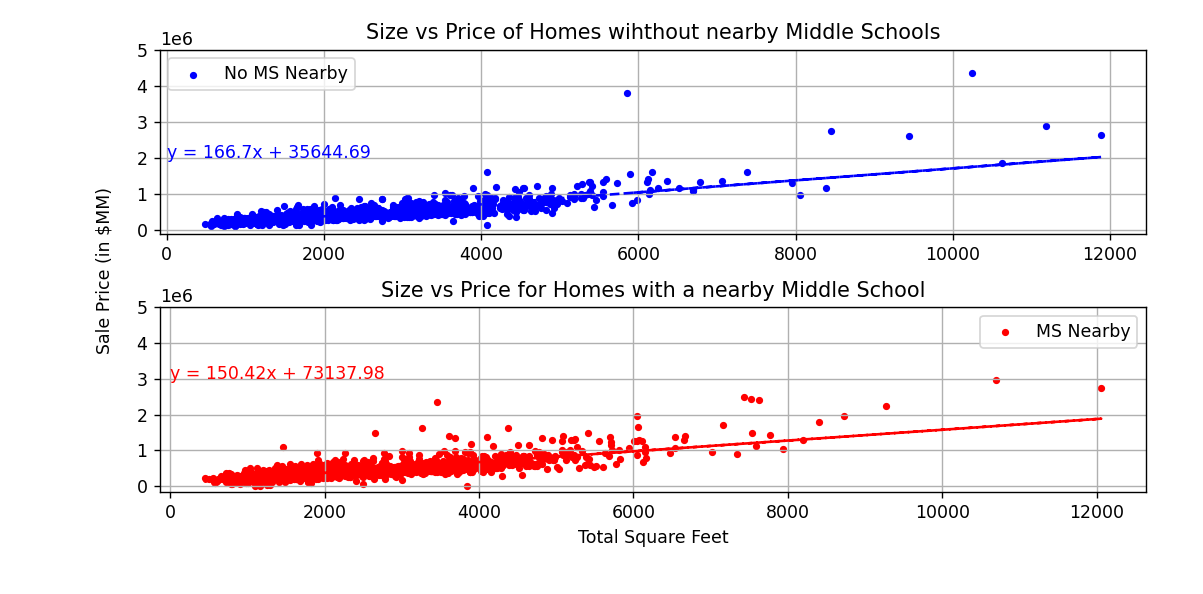

In [13]:
#Scatter Plot 2 total sq ft vs price
#Comparing to if there is a Middle School nearby vs. not
x_axis = noms_df["Total Sq Ft"]
y_axis = noms_df["Sale Price"]
x_axis_2 = ms_df["Total Sq Ft"]
y_axis_2 = ms_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No MS Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout nearby Middle Schools")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(0,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='MS Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby Middle School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph3-ms-vs-no-ms")
plt.show()

<IPython.core.display.Javascript object>


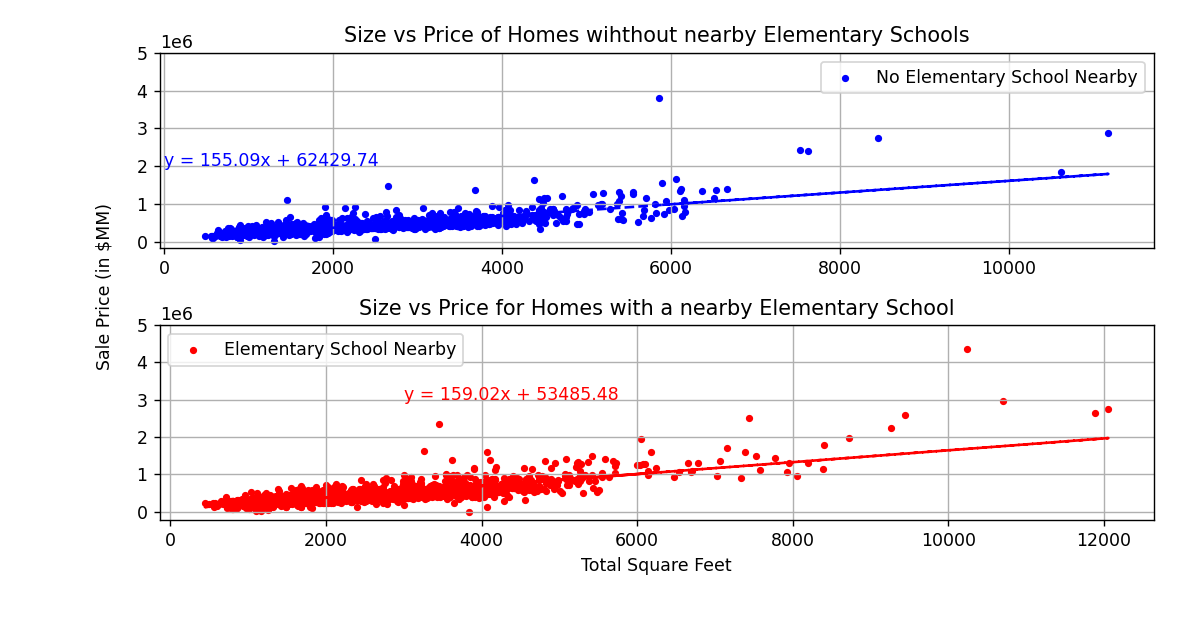

In [14]:
#Scatter Plot 3 total sq ft vs price
#Comparing to if there is a Elementary School nearby vs. not
x_axis = noes_df["Total Sq Ft"]
y_axis = noes_df["Sale Price"]
x_axis_2 = es_df["Total Sq Ft"]
y_axis_2 = es_df["Sale Price"]

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


(ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
ax1_regress_values = x_axis * ax1slope + ax1intercept
ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="o", label='No Elementary School Nearby')
ax1.grid()
ax1.set_title("Size vs Price of Homes wihthout nearby Elementary Schools")
ax1.set_yticks(np.arange(0,6000000,1000000))



(ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
ax2.annotate(ax2_line_eq,(3000,3000000),fontsize=10,color="red")
ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="o", label='Elementary School Nearby')
ax2.grid()
ax2.set_title("Size vs Price for Homes with a nearby Elementary School")
ax2.set_yticks(np.arange(0,6000000,1000000))


ax1.legend(loc='best')
ax2.legend(loc='best')
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price (in $MM)")
fig.tight_layout()
plt.savefig("Images/graph4-es-vs-no-es")
plt.show()

<IPython.core.display.Javascript object>


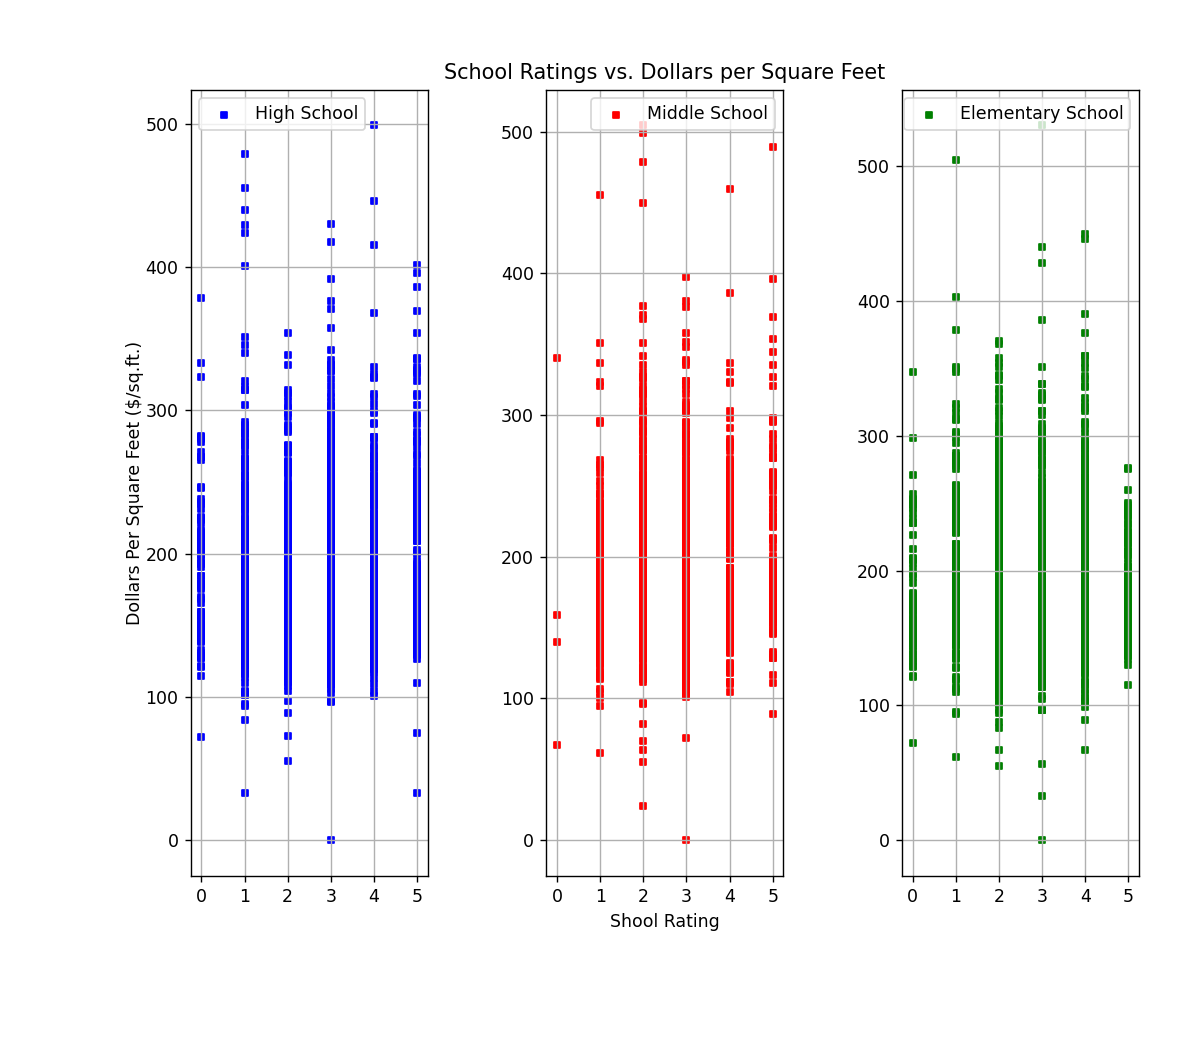

In [15]:
#Scatter Plot 3 total sq ft vs price
#Comparing to if there is a Elementary School nearby vs. not
x_axis = hs_df["High School Rank"]
y_axis = hs_df["dollar/sqft"]
x_axis_2 = ms_df["Middle School Rank"]
y_axis_2 = ms_df["dollar/sqft"]
x_axis_3 = es_df["Elementary School Rank"]
y_axis_3 = es_df["dollar/sqft"] 

fig = plt.figure()
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)


# (ax1slope, ax1intercept, ax1rvalue, ax1pvalue, ax1stderr) = st.linregress(x_axis, y_axis)
# ax1_regress_values = x_axis * ax1slope + ax1intercept
# ax1_line_eq = "y = " + str(round(ax1slope,2)) + "x + " + str(round(ax1intercept,2))
# ax1.annotate(ax1_line_eq,(0,2000000),fontsize=10,color="blue")
# ax1.plot(x_axis, ax1_regress_values,"b--")
ax1.scatter(x_axis, y_axis, s=10, c='b', marker="s", label='High School')
ax1.grid()
# ax1.set_title("High School Rating vs. Dollars per Square Feet", loc='left')
ax1.set_xticks(np.arange(0,6,1))



# (ax2slope, ax2intercept, ax2rvalue, ax2pvalue, ax2stderr) = st.linregress(x_axis_2, y_axis_2)
# ax2_regress_values = x_axis_2 * ax2slope + ax2intercept
# ax2_line_eq = "y = " + str(round(ax2slope,2)) + "x + " + str(round(ax2intercept,2))
# ax2.annotate(ax2_line_eq,(0,3000000),fontsize=10,color="red")
# ax2.plot(x_axis_2, ax2_regress_values,"r--")
ax2.scatter(x_axis_2, y_axis_2, s=10, c='r', marker="s", label='Middle School')
ax2.grid()
ax2.set_title("School Ratings vs. Dollars per Square Feet")
ax2.set_xticks(np.arange(0,6,1))


# (ax3slope, ax3intercept, ax3rvalue, ax3pvalue, ax3stderr) = st.linregress(x_axis_3, y_axis_3)
# ax3_regress_values = x_axis_3 * ax3slope + ax3intercept
# ax3_line_eq = "y = " + str(round(ax3slope,2)) + "x + " + str(round(ax3intercept,2))
# ax3.annotate(ax3_line_eq,(0,3000000),fontsize=10,color="green")
# ax3.plot(x_axis_3, ax3_regress_values,"g--")
ax3.scatter(x_axis_3, y_axis_3, s=10, c='g', marker="s", label='Elementary School')
ax3.grid()
# ax3.set_title("Elementary School Rating vs. Dollars per Square Feet", loc='right')
ax3.set_xticks(np.arange(0,6,1))

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

ax.set_xlabel("Shool Rating")
ax.set_ylabel("Dollars Per Square Feet ($/sq.ft.)")
fig.tight_layout()
plt.savefig("Images/graph5-school-rank-vs-dollars-per-sq-ft")
plt.show()

In [16]:
x_axis = hs_df["High School Rank"]
y_axis = hs_df["dollar/sqft"]
plt.scatter(x_axis, y_axis, color='r', edgecolor='w', marker='o', s=40)
plt.title("Highschool Ratings vs Dollars/Sq Ft")
plt.xlabel("School Rating")
plt.ylabel("Dollars Per Square Feet ($/sq.ft)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,0),fontsize=10,color="red")
plt.plot(x_axis, regress_values,"r--")
plt.savefig("Images/error-ratings-vs-dollarsqft")
plt.show()

<IPython.core.display.Javascript object>

In [17]:
x_axis_2 = ms_df["Middle School Rank"]
y_axis_2 = ms_df["dollar/sqft"]
plt.scatter(x_axis_2, y_axis_2, color='b', edgecolor='w', marker='o', s=40)
plt.title("Middle School Ratings vs Dollars/Sq Ft")
plt.xlabel("School Rating")
plt.ylabel("Dollars Per Square Feet ($/sq.ft)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_2, y_axis_2)
regress_values = x_axis_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,0),fontsize=10,color="b")
plt.plot(x_axis_2, regress_values,"b--")
plt.show()

<IPython.core.display.Javascript object>

In [18]:
x_axis_3 = es_df["Elementary School Rank"]
y_axis_3 = es_df["dollar/sqft"] 
plt.scatter(x_axis_3, y_axis_3, color='g', edgecolor='w', marker='o', s=40)
plt.title("Elementary School Ratings vs Dollars/Sq Ft")
plt.xlabel("School Rating")
plt.ylabel("Dollars Per Square Feet ($/sq.ft)")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_3, y_axis_3)
regress_values = x_axis_3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,0),fontsize=10,color="g")
plt.plot(x_axis_3, regress_values,"g--")
plt.show()

<IPython.core.display.Javascript object>

In [19]:
df = data_df.copy()
df

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4628075,890000.0,2021-04-12,16 Polo DR,80906,3063.0,10890.0,38.7974702,-104.841016,Palmer High School,5.0,NaN,5.0,NaN,NaN,290.564806,NaN
4350,5664354,915000.0,2021-04-12,17925 Black Squirrel RD,80908,4808.0,625086.0,39.092056,-104.627332,Smoky Hill High School,NaN,NaN,NaN,Talbott Steam Innovation School,NaN,190.307820,NaN
4351,1719141,925000.0,2021-04-09,390 Paisley DR,80906,4822.0,13068.0,38.7435755,-104.835224,Mitchell High School,2.0,NaN,NaN,Stratmoor Hills Elementary School,5.0,191.829117,NaN
4352,3250460,990900.0,2021-04-15,4937 Rainbow Gulch TR,80924,6140.0,12120.0,38.9758208,-104.735368,Liberty High School,4.0,NaN,NaN,Pinello Elementary School,5.0,161.384365,NaN


In [20]:
walkdf = df[df["Walk Score"].notna()]
walkdf

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq Ft,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,dollar/sqft,Walk Score
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.128205,53.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.799713,10.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.868158,34.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.164404,6.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.364289,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,7444460,1000000.0,2021-03-12,2975 S Electra DR,80906,5364.0,34670.0,38.8229772,-104.875324,NaN,NaN,NaN,3.0,NaN,0.0,186.428039,0.0
2625,6416567,1165000.0,2021-03-09,4558 Silver Nell DR,80908,4527.0,121097.0,39.083166,-104.744444,NaN,4.0,NaN,4.0,NaN,4.0,257.344820,0.0
2626,6751431,3800000.0,2021-03-11,755 El Pomar RD #632,80906,5862.0,882.0,38.7894231,-104.854078,NaN,5.0,NaN,5.0,NaN,NaN,648.242921,31.0
2627,2174596,295000.0,2021-03-17,117 Rose DR,80911,1131.0,6000.0,38.7561206,-104.744096,NaN,1.0,NaN,NaN,NaN,NaN,260.831123,49.0


In [21]:
x_axis = walkdf["Walk Score"]
y_axis = walkdf["Sale Price"]
y_axis_1 = walkdf ["dollar/sqft"]

plt.scatter(x_axis, y_axis, marker="o", c="y", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,2000000),fontsize=10,color="r")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (40,3500000), fontsize=10, color='red')
plt.plot(x_axis, regress_values,"r--")
plt.title("Walk Score vs. Housing Prices")
plt.xlabel('Walk Score')
plt.ylabel('Sale Price (in $MM)')
plt.yticks(np.arange(0,5000000,500000))
plt.xticks(np.arange(0,120,20))
plt.grid()
plt.savefig("Images/graph6-walkscore-vs-price")
plt.show()

<IPython.core.display.Javascript object>

In [22]:
x_axis = walkdf["Walk Score"]
y_axis = walkdf ["dollar/sqft"]

plt.scatter(x_axis, y_axis, marker="o", color="orange", edgecolor="g")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,600),fontsize=10,color="b")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (40,700), fontsize=10, color='blue')
plt.plot(x_axis, regress_values,"b--")
plt.title("Walk Score vs. Dollars per Square Feet")
plt.xlabel('Walk Score')
plt.ylabel('Dollar Per Square Feet ($/sq.ft)')
plt.yticks(np.arange(0,850,50))
plt.xticks(np.arange(0,120,20))
plt.grid()
plt.savefig("Images/graph7-walkscore-vs-dollarsqft")
plt.show()


<IPython.core.display.Javascript object>